# Example 1: A quick look at 5 deterministic machine-learning models

#### Huan Tran

Some deterministic (non-probabilistic) ML models supported by matsML are introduced here. They models are
1. Support Vector Regression
2. Random Forest Regression
3. Kernel Ridge Regression
4. Gaussian Process Regression
5. Fully-Connected Neural Net

A simple dataset will be obtained from www.matsml.org for this example.

__Load data__

This is a <em>fingerprinted</em> dataset, being ready for machine learning. It contains 192 compositions of hybrid organic-inorganic perovskites, each of them is represented by a fingerprint vector and the averaged band gap of multiple atomic structures predicted for this composition. The raw data leading to this dataset is available at https://www.nature.com/articles/sdata201757.

In [1]:
from matsml.data import Datasets
import pandas as pd

# obtain data
data=Datasets(S1='fp_hoips_S1_1dest')
data.load_dataset()

# Have a look at the data fields. You will see "ID" is for the identification of the data points, 
# 'Ymean' is the target (the averaged band gap mentioned above), and the others are the components
# of the fingeprint vector
fp_data = pd.read_csv('fp_hoips_S1_1dest.csv.gz')
print (fp_data.shape)
print (fp_data.columns)

  matsML, v1.0.1
  *****
  Load requested dataset(s)
  Data saved in fp_hoips_S1_1dest.csv.gz
(192, 34)
Index(['Unnamed: 0', 'ID', 'Ymean', 'MagpieData avg_dev GSvolume_pa',
       'MatscholarElementData mean embedding 54',
       'MatscholarElementData std_dev embedding 116',
       'MatscholarElementData std_dev embedding 155',
       'MatscholarElementData mean embedding 4',
       'PymatgenData mean mendeleev_no',
       'MatscholarElementData std_dev embedding 136',
       'MatscholarElementData std_dev embedding 153',
       'MatscholarElementData mean embedding 140',
       'MatscholarElementData mean embedding 170', 'H1N4H1', 'H1N3H1',
       'H1N3C3', 'N3C3N3', 'N3C3H1', 'H1C3C3', 'C3C3N3', 'C3N3C3', 'H1C4H1',
       'H1C4C4', 'C4C4C4', 'C4C4N4', 'H1C4N4', 'C4N4H1', 'N4N3H1', 'H1N4N3',
       'C4N4C4', 'H1N4O2', 'N4O2H1', 'C3C4H1', 'C4C3N3'],
      dtype='object')


__Essential parameters of the obtained dataset, given as a dict, and needed for ML models__

In [2]:
# data parameters
data_file ='fp_hoips_S1_1dest.csv.gz'
id_col=['ID']
y_cols=['Ymean']
comment_cols=[]
n_trains=0.9
sampling='random'
x_scaling='minmax'
y_scaling='minmax'

data_params={'data_file':data_file,'id_col':id_col,'y_cols':y_cols, 'comment_cols':comment_cols,
    'y_scaling':y_scaling,'x_scaling':x_scaling,'sampling':sampling, 'n_trains':n_trains}

__Model 1: Support Vector Regression__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    support vector regression w/ scikit-learn
    kernel                       rbf
    regular_param                2
    max_iter                     -1
    nfold_cv                     5
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.062320 0.078931 0.078931
    cv,rmse_train,rmse_test,rmse_opt: 1 0.067054 0.072070 0.072070
    cv,rmse_train,rmse_test,rm

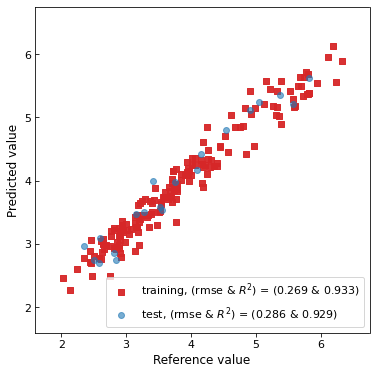

In [3]:
from matsml.models import SVecR

# Model parameters
nfold_cv=5 
model_file='model_svr.pkl'
verbosity=0
rmse_cv=False
regular_param=2
kernel='rbf'
max_iter=-1

model_params={'kernel':kernel,'nfold_cv':nfold_cv,'regular_param':regular_param, 'max_iter':max_iter,
    'model_file':model_file,'verbosity':verbosity,'rmse_cv':rmse_cv}

model=SVecR(data_params=data_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 2: Random Forest Regression__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    random forest regression w/ scikit-learn
    nfold_cv                     5
    n_estimators                 20
    max_depth                    8
    criterion                    mse
    get_feature_importances      True
    random_state                 11
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.022399 0.046180 0.046180
    cv,rmse_train,rmse_t

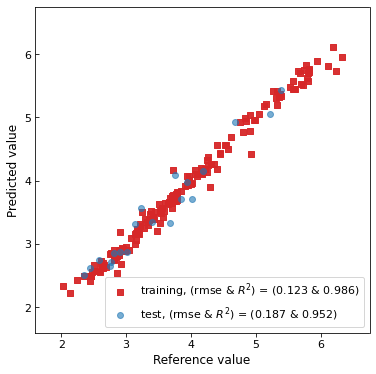

In [4]:
from matsml.models import RFR

# Model parameters
nfold_cv=5
model_file='model_rfr.pkl'
verbosity=0
rmse_cv=False
n_estimators=20
random_state=11
criterion='mse'
max_depth=8
get_feature_importances=True

model_params={'nfold_cv':nfold_cv,'n_estimators':n_estimators,'random_state':random_state,
    'criterion':criterion,'max_depth':max_depth,'get_feature_importances':get_feature_importances,
    'model_file':model_file,'verbosity':verbosity,'rmse_cv':rmse_cv}

model=RFR(data_params=data_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 3: Kernel Ridge Regression (KRR)__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    kernel ridge regression w/ scikit-learn
    kernel                       rbf
    nfold_cv                     5
    alpha                        [-2, 5]
    gamma                        [-2, 5]
    number of alpha/gamma grids  10
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Building model                 KRR
  Training model w/ cross validation
  KRR model trained, now make predictions & invert scaling
    unscaling y: minmax

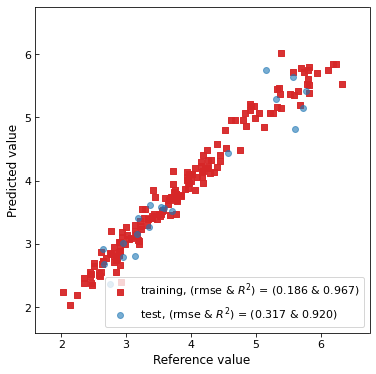

In [5]:
from matsml.models import KRR

# Model parameters
nfold_cv = 5
model_file = 'model_krr.pkl'
alpha = [-2,5]
gamma = [-2,5]
n_grids = 10
kernel = 'rbf'

model_params={'kernel':kernel,'nfold_cv':nfold_cv,'model_file':model_file,'alpha':alpha,
    'gamma':gamma,'n_grids':n_grids}

model = KRR(data_params=data_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 4: Gaussian Process Regression__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    gaussian process regression w/ scikit-learn
    nfold_cv                     5
    optimizer                    fmin_l_bfgs_b
    n_restarts_optimizer         100
    rmse_cv                      True
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.020118 0.034120 0.034120
    unscaling y: minmax
       rmse cv_test      Ymean            0.146779
    cv

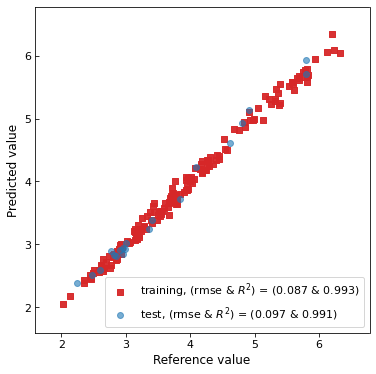

In [6]:
from matsml.models import GPR

# Model parameters
nfold_cv=5
model_file='model_gpr.pkl'
verbosity=0
rmse_cv=True
n_restarts_optimizer=100

model_params={'nfold_cv':nfold_cv,'n_restarts_optimizer':n_restarts_optimizer,'model_file':model_file,
    'verbosity':verbosity,'rmse_cv':rmse_cv}

model=GPR(data_params=data_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

__Model 5: Fully-Connected Neural Net__

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    fully connected NeuralNet w/ TensorFlow
    layers                       [5, 5]
    activ_funct                  elu
    epochs                       300
    optimizer                    nadam
    nfold_cv                     5
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Building model                 FCNN
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.046565 0.058864 0.058864
    cv,rmse_trai

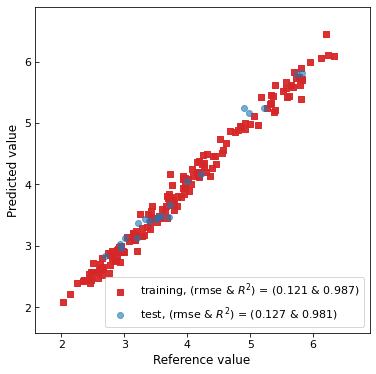

In [7]:
from matsml.models import FCNN

# model parameters
layers=[5,5]
epochs=300
nfold_cv=5
use_bias=True
model_file='model_fcnn.pkl'
loss='mse'
verbosity=0
batch_size=32
activ_funct='elu'
optimizer='nadam'

model_params={'layers':layers,'activ_funct':activ_funct,'epochs':epochs,'nfold_cv':nfold_cv,
    'optimizer':optimizer,'use_bias':use_bias,'model_file':model_file,'loss':loss,
    'batch_size':batch_size,'verbosity':verbosity,'rmse_cv':False}

model=FCNN(data_params=data_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)